In [724]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [725]:
df = pd.read_csv('Preprocessed data ENVISION ROUND 1.csv')
df

,event_id,disaster_type,location,latitude,longitude,date,severity_level,affected_population,estimated_economic_loss_usd,response_time_hours,aid_provided,infrastructure_damage_index,is_major_disaster
0,1,Wildfire,Chile,-34.681672,-71.819529,2025-08-27,8,31104,2768213.39,5.12,Yes,0.59,1
1,2,Hurricane,India,22.128569,78.023951,2023-05-29,5,29340,5996226.87,44.43,No,0.26,0
2,3,Volcanic Eruption,Italy,42.316058,11.031447,2023-01-15,7,34804,9222541.48,49.30,No,0.94,1
3,4,Drought,Chile,-33.436253,-69.984615,2024-02-08,8,31191,1827703.09,65.56,Yes,0.94,1
4,5,Volcanic Eruption,Turkey,39.400977,37.006822,2023-12-23,8,46284,13435921.49,60.96,No,0.92,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,19996,Volcanic Eruption,India,19.962542,82.590546,2025-11-16,6,28135,2556182.54,38.71,No,0.69,0
19996,19997,Volcanic Eruption,Japan,35.853659,138.522874,2025-04-08,2,4340,1228534.00,7.67,No,0.18,0
19997,19998,Hurricane,Philippines,13.720136,121.306074,2025-08-26,8,44663,8518260.66,9.76,Yes,0.75,1
19998,19999,Volcanic Eruption,India,19.959071,77.272460,2023-03-24,7,37484,10802942.53,13.87,Yes,0.77,1


In [726]:
print("Dataset Shape:", df.shape)

Dataset Shape: (20000, 13)


In [727]:
print("Column Names:")
print(df.columns.tolist())

Column Names:
['event_id', 'disaster_type', 'location', 'latitude', 'longitude', 'date', 'severity_level', 'affected_population', 'estimated_economic_loss_usd', 'response_time_hours', 'aid_provided', 'infrastructure_damage_index', 'is_major_disaster']


In [728]:
print("First few rows:")
print(df.head())

First few rows:
   event_id      disaster_type location   latitude  longitude        date  \
0         1           Wildfire    Chile -34.681672 -71.819529  2025-08-27   
1         2          Hurricane    India  22.128569  78.023951  2023-05-29   
2         3  Volcanic Eruption    Italy  42.316058  11.031447  2023-01-15   
3         4            Drought    Chile -33.436253 -69.984615  2024-02-08   
4         5  Volcanic Eruption   Turkey  39.400977  37.006822  2023-12-23   

   severity_level  affected_population  estimated_economic_loss_usd  \
0               8                31104                   2768213.39   
1               5                29340                   5996226.87   
2               7                34804                   9222541.48   
3               8                31191                   1827703.09   
4               8                46284                  13435921.49   

   response_time_hours aid_provided  infrastructure_damage_index  \
0                 5.12    

In [729]:
print("Data Types:")
print(df.dtypes)

Data Types:
event_id                         int64
disaster_type                   object
location                        object
latitude                       float64
longitude                      float64
date                            object
severity_level                   int64
affected_population              int64
estimated_economic_loss_usd    float64
response_time_hours            float64
aid_provided                    object
infrastructure_damage_index    float64
is_major_disaster                int64
dtype: object


In [730]:
print("\nMissing Values:")
print(df.isnull().sum())


Missing Values:
event_id                       0
disaster_type                  0
location                       0
latitude                       0
longitude                      0
date                           0
severity_level                 0
affected_population            0
estimated_economic_loss_usd    0
response_time_hours            0
aid_provided                   0
infrastructure_damage_index    0
is_major_disaster              0
dtype: int64


In [731]:
print("Basic Statistics:")
print(df.describe())

Basic Statistics:
           event_id      latitude     longitude  severity_level  \
count  20000.000000  20000.000000  20000.000000    20000.000000   
mean   10000.500000     18.749811     41.976629        5.489300   
std     5773.647028     25.026759     82.535922        2.866269   
min        1.000000    -43.127383   -102.133704        1.000000   
25%     5000.750000      3.560059      8.346726        3.000000   
50%    10000.500000     24.361006     74.600322        5.000000   
75%    15000.250000     38.285895    117.460836        8.000000   
max    20000.000000     48.452161    145.902669       10.000000   

       affected_population  estimated_economic_loss_usd  response_time_hours  \
count         20000.000000                 2.000000e+04         20000.000000   
mean          27641.248950                 4.831073e+06            36.369664   
std           16017.199074                 3.624308e+06            20.420570   
min               0.000000                 0.000000e+00   

## **Data Preprocessing and Feature Engineering**

In [732]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import seaborn as sns
from datetime import datetime

In [733]:
df_processed = df.copy()

In [734]:
le_disaster = LabelEncoder()
le_location = LabelEncoder()
le_aid = LabelEncoder()

In [735]:
df_processed['date'] = pd.to_datetime(df_processed['date'])
df_processed['year'] = df_processed['date'].dt.year
df_processed['month'] = df_processed['date'].dt.month
df_processed['day_of_year'] = df_processed['date'].dt.dayofyear
df_processed['quarter'] = df_processed['date'].dt.quarter

In [736]:
df_processed['disaster_type_encoded'] = le_disaster.fit_transform(df_processed['disaster_type'])
df_processed['location_encoded'] = le_location.fit_transform(df_processed['location'])
df_processed['aid_provided_encoded'] = le_aid.fit_transform(df_processed['aid_provided'])

In [737]:
print("Data preprocessing completed!")
print(f"\nDisaster types: {le_disaster.classes_}")
print(f"\nProcessed data shape: {df_processed.shape}")
df_processed.head()

Data preprocessing completed!

Disaster types: ['Drought' 'Earthquake' 'Flood' 'Hurricane' 'Landslide'
 'Volcanic Eruption' 'Wildfire']

Processed data shape: (20000, 20)


,event_id,disaster_type,location,latitude,longitude,date,severity_level,affected_population,estimated_economic_loss_usd,response_time_hours,aid_provided,infrastructure_damage_index,is_major_disaster,year,month,day_of_year,quarter,disaster_type_encoded,location_encoded,aid_provided_encoded
0,1,Wildfire,Chile,-34.681672,-71.819529,2025-08-27,8,31104,2768213.39,5.12,Yes,0.59,1,2025,8,239,3,6,0,1
1,2,Hurricane,India,22.128569,78.023951,2023-05-29,5,29340,5996226.87,44.43,No,0.26,0,2023,5,149,2,3,1,0
2,3,Volcanic Eruption,Italy,42.316058,11.031447,2023-01-15,7,34804,9222541.48,49.30,No,0.94,1,2023,1,15,1,5,3,0
3,4,Drought,Chile,-33.436253,-69.984615,2024-02-08,8,31191,1827703.09,65.56,Yes,0.94,1,2024,2,39,1,0,0,1
4,5,Volcanic Eruption,Turkey,39.400977,37.006822,2023-12-23,8,46284,13435921.49,60.96,No,0.92,1,2023,12,357,4,5,6,0


## **Exploratory Data Analysis**

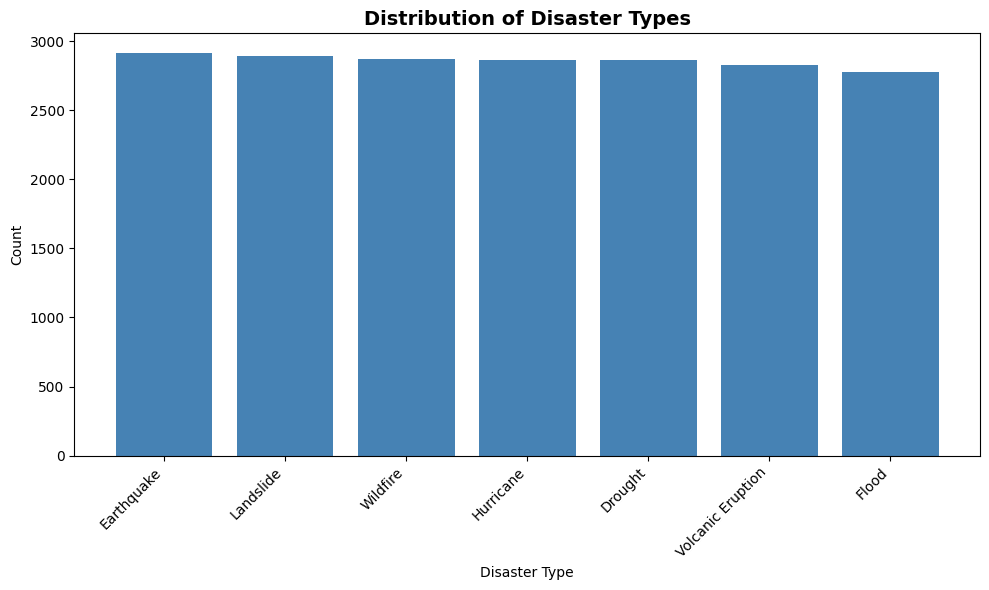

In [738]:
disaster_counts = df_processed['disaster_type'].value_counts()
plt.figure(figsize=(10, 6))
plt.bar(disaster_counts.index, disaster_counts.values, color='steelblue')
plt.title('Distribution of Disaster Types', fontsize=14, fontweight='bold')
plt.xlabel('Disaster Type')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

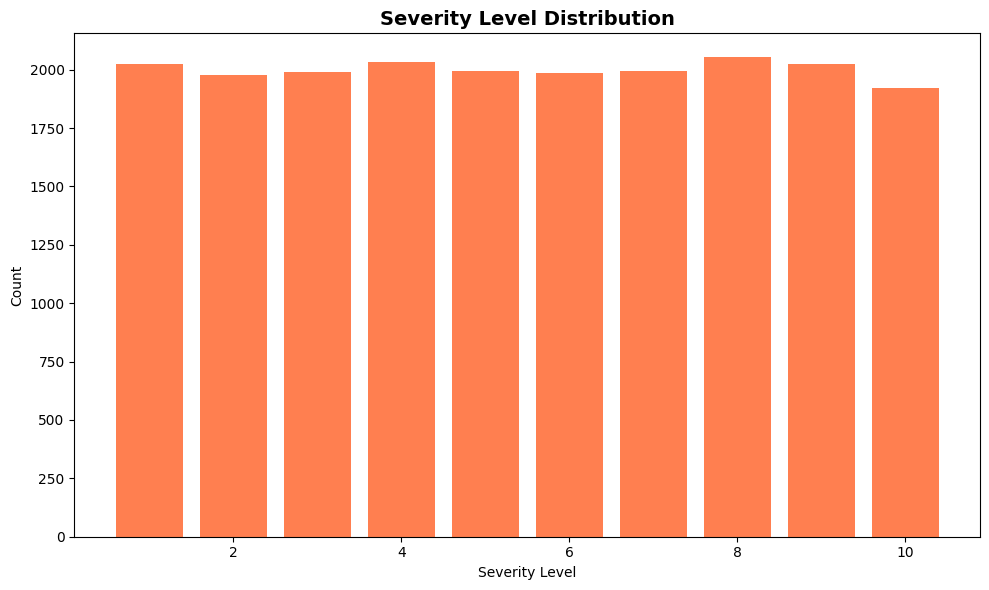

In [739]:
severity_counts = df_processed['severity_level'].value_counts().sort_index()

plt.figure(figsize=(10, 6))
plt.bar(severity_counts.index, severity_counts.values, color='coral')
plt.title('Severity Level Distribution', fontsize=14, fontweight='bold')
plt.xlabel('Severity Level')
plt.ylabel('Count')
plt.tight_layout()
plt.show()

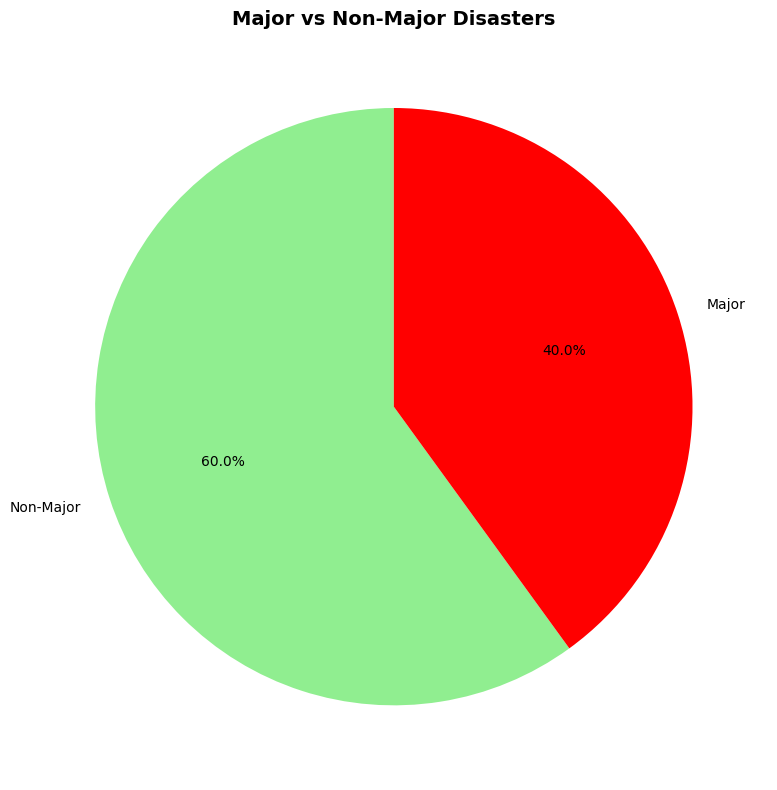

In [740]:
major_counts = df_processed['is_major_disaster'].value_counts()
labels = ['Non-Major', 'Major']

plt.figure(figsize=(8, 8))
plt.pie(major_counts.values, labels=labels, autopct='%1.1f%%', 
        colors=['lightgreen', 'red'], startangle=90)
plt.title('Major vs Non-Major Disasters', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

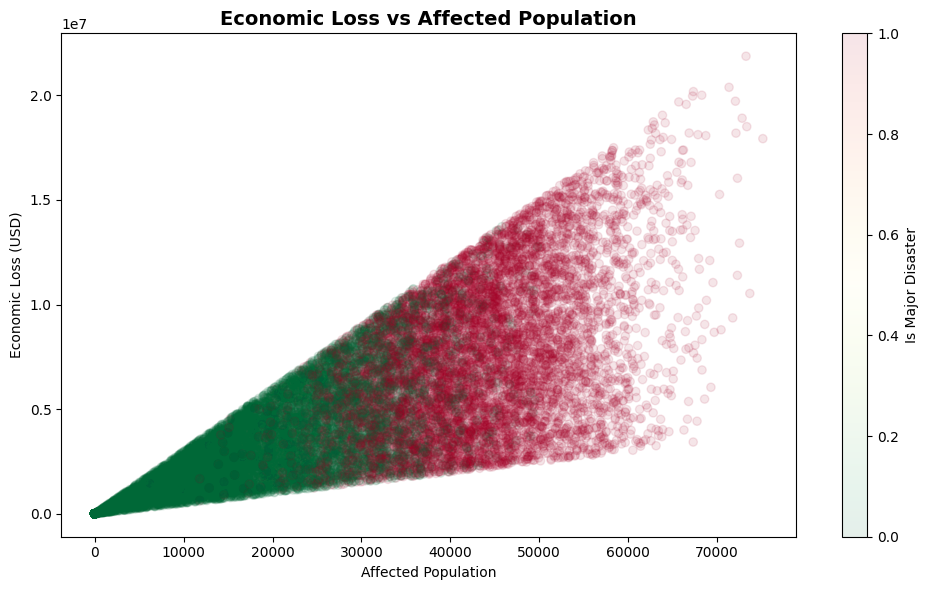

In [741]:
plt.figure(figsize=(10, 6))
scatter = plt.scatter(df_processed['affected_population'], 
                     df_processed['estimated_economic_loss_usd'],
                     c=df_processed['is_major_disaster'], 
                     cmap='RdYlGn_r', alpha=0.1)
plt.title('Economic Loss vs Affected Population', fontsize=14, fontweight='bold')
plt.xlabel('Affected Population')
plt.ylabel('Economic Loss (USD)')
plt.colorbar(scatter, label='Is Major Disaster')
plt.tight_layout()
plt.show()

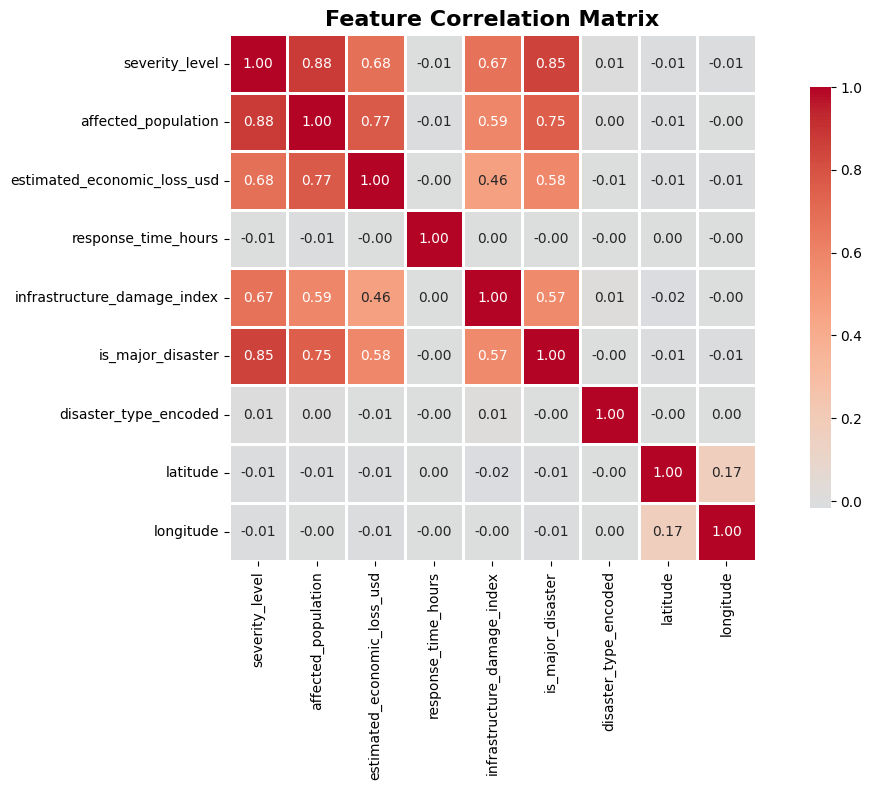

In [742]:
plt.figure(figsize=(12, 8))
correlation_features = ['severity_level', 'affected_population', 'estimated_economic_loss_usd', 
                        'response_time_hours', 'infrastructure_damage_index', 'is_major_disaster',
                        'disaster_type_encoded', 'latitude', 'longitude']
corr_matrix = df_processed[correlation_features].corr()
sns.heatmap(corr_matrix, annot=True, fmt='.2f', cmap='coolwarm', center=0, 
            square=True, linewidths=1, cbar_kws={"shrink": 0.8})
plt.title('Feature Correlation Matrix', fontsize=16, fontweight='bold')
plt.tight_layout()
plt.show()

In [743]:
print("\nKey Insights:")
print(f"- Total disasters: {len(df_processed)}")
print(f"- Major disasters: {df_processed['is_major_disaster'].sum()} ({df_processed['is_major_disaster'].mean()*100:.1f}%)")
print(f"- Average affected population: {df_processed['affected_population'].mean():.0f}")
print(f"- Average economic loss: ${df_processed['estimated_economic_loss_usd'].mean():,.2f}")
print(f"- Average response time: {df_processed['response_time_hours'].mean():.1f} hours")


Key Insights:
- Total disasters: 20000
- Major disasters: 8001 (40.0%)
- Average affected population: 27641
- Average economic loss: $4,831,072.65
- Average response time: 36.4 hours


## **Model 1 - Major Disaster Prediction (Classification)**

In [744]:
feature_cols = ['disaster_type_encoded', 'location_encoded', 'latitude', 'longitude',
                'severity_level', 'affected_population', 'infrastructure_damage_index',
                'month', 'quarter', 'day_of_year']

In [745]:
X_disaster = df_processed[feature_cols]
y_disaster = df_processed['is_major_disaster']

In [746]:
X_train_d, X_test_d, y_train_d, y_test_d = train_test_split(
    X_disaster, y_disaster, test_size=0.2, random_state=42, stratify=y_disaster
)

In [747]:
scaler_disaster = StandardScaler()
X_train_d_scaled = scaler_disaster.fit_transform(X_train_d)
X_test_d_scaled = scaler_disaster.transform(X_test_d)

In [748]:
rf_disaster = RandomForestClassifier(
    n_estimators=100, 
    max_depth=15, 
    min_samples_split=10,
    min_samples_leaf=4,
    random_state=42,
    n_jobs=-1
)

In [749]:
print("Training Major Disaster Prediction Model...")
rf_disaster.fit(X_train_d_scaled, y_train_d)

Training Major Disaster Prediction Model...


,"n_estimators n_estimators: int, default=100The number of trees in the forest... versionchanged:: 0.22 The default value of ``n_estimators`` changed from 10 to 100 in 0.22.",100
,"criterion criterion: {""gini"", ""entropy"", ""log_loss""}, default=""gini""The function to measure the quality of a split. Supported criteria are""gini"" for the Gini impurity and ""log_loss"" and ""entropy"" both for theShannon information gain, see :ref:`tree_mathematical_formulation`.Note: This parameter is tree-specific.",'gini'
,"max_depth max_depth: int, default=NoneThe maximum depth of the tree. If None, then nodes are expanded untilall leaves are pure or until all leaves contain less thanmin_samples_split samples.",15
,"min_samples_split min_samples_split: int or float, default=2The minimum number of samples required to split an internal node:- If int, then consider `min_samples_split` as the minimum number.- If float, then `min_samples_split` is a fraction and `ceil(min_samples_split * n_samples)` are the minimum number of samples for each split... versionchanged:: 0.18 Added float values for fractions.",10
,"min_samples_leaf min_samples_leaf: int or float, default=1The minimum number of samples required to be at a leaf node.A split point at any depth will only be considered if it leaves atleast ``min_samples_leaf`` training samples in each of the left andright branches. This may have the effect of smoothing the model,especially in regression.- If int, then consider `min_samples_leaf` as the minimum number.- If float, then `min_samples_leaf` is a fraction and `ceil(min_samples_leaf * n_samples)` are the minimum number of samples for each node... versionchanged:: 0.18 Added float values for fractions.",4
,"min_weight_fraction_leaf min_weight_fraction_leaf: float, default=0.0The minimum weighted fraction of the sum total of weights (of allthe input samples) required to be at a leaf node. Samples haveequal weight when sample_weight is not provided.",0.0
,"max_features max_features: {""sqrt"", ""log2"", None}, int or float, default=""sqrt""The number of features to consider when looking for the best split:- If int, then consider `max_features` features at each split.- If float, then `max_features` is a fraction and `max(1, int(max_features * n_features_in_))` features are considered at each split.- If ""sqrt"", then `max_features=sqrt(n_features)`.- If ""log2"", then `max_features=log2(n_features)`.- If None, then `max_features=n_features`... versionchanged:: 1.1 The default of `max_features` changed from `""auto""` to `""sqrt""`.Note: the search for a split does not stop until at least onevalid partition of the node samples is found, even if it requires toeffectively inspect more than ``max_features`` features.",'sqrt'
,"max_leaf_nodes max_leaf_nodes: int, default=NoneGrow trees with ``max_leaf_nodes`` in best-first fashion.Best nodes are defined as relative reduction in impurity.If None then unlimited number of leaf nodes.",None
,"min_impurity_decrease min_impurity_decrease: float, default=0.0A node will be split if this split induces a decrease of the impuritygreater than or equal to this value.The weighted impurity decrease equation is the following:: N_t / N * (impurity - N_t_R / N_t * right_impurity - N_t_L / N_t * left_impurity)where ``N`` is the total number of samples, ``N_t`` is the number ofsamples at the current node, ``N_t_L`` is the number of samples in theleft child, and ``N_t_R`` is the number of samples in the right child.``N``, ``N_t``, ``N_t_R`` and ``N_t_L`` all refer to the weighted sum,if ``sample_weight`` is passed... versionadded:: 0.19",0.0
,"bootstrap bootstrap: bool, default=TrueWhether bootstrap samples are used when building trees. If False, thewhole dataset is used to build each tree.",True
,"oob_score oob_score: bool or callable, default=FalseWhether to use out-of-bag samples to estimate the generalization score.By default, :func:`~sklearn.metrics.accuracy_score` is used.Provide a callable with signature `metric(

In [750]:
y_pred_d = rf_disaster.predict(X_test_d_scaled)
y_pred_proba_d = rf_disaster.predict_proba(X_test_d_scaled)

In [751]:
accuracy = accuracy_score(y_test_d, y_pred_d)
print(f"DISASTER PREDICTION MODEL PERFORMANCE")
print(f"Accuracy: {accuracy*100:.2f}%\n")
print("Classification Report:")
print(classification_report(y_test_d, y_pred_d, target_names=['Non-Major', 'Major']))


DISASTER PREDICTION MODEL PERFORMANCE
Accuracy: 99.95%

Classification Report:
              precision    recall  f1-score   support

   Non-Major       1.00      1.00      1.00      2400
       Major       1.00      1.00      1.00      1600

    accuracy                           1.00      4000
   macro avg       1.00      1.00      1.00      4000
weighted avg       1.00      1.00      1.00      4000



In [752]:
accuracy = accuracy_score(y_test_d, y_pred_d)
print(f"DISASTER PREDICTION MODEL PERFORMANCE")
print(f"Accuracy: {accuracy*100:.2f}%\n")
print("Classification Report:")
print(classification_report(y_test_d, y_pred_d, target_names=['Non-Major', 'Major']))

DISASTER PREDICTION MODEL PERFORMANCE
Accuracy: 99.95%

Classification Report:
              precision    recall  f1-score   support

   Non-Major       1.00      1.00      1.00      2400
       Major       1.00      1.00      1.00      1600

    accuracy                           1.00      4000
   macro avg       1.00      1.00      1.00      4000
weighted avg       1.00      1.00      1.00      4000



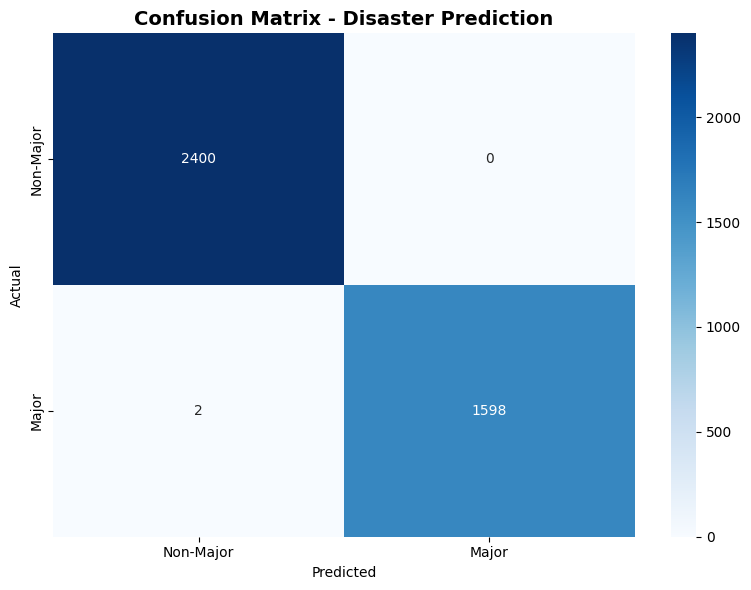

In [753]:
plt.figure(figsize=(8, 6))
cm = confusion_matrix(y_test_d, y_pred_d)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['Non-Major', 'Major'],
            yticklabels=['Non-Major', 'Major'])
plt.title('Confusion Matrix - Disaster Prediction', fontsize=14, fontweight='bold')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.tight_layout()
plt.show()

In [754]:
feature_importance_d = pd.DataFrame({
    'Feature': feature_cols,
    'Importance': rf_disaster.feature_importances_
}).sort_values('Importance', ascending=False)

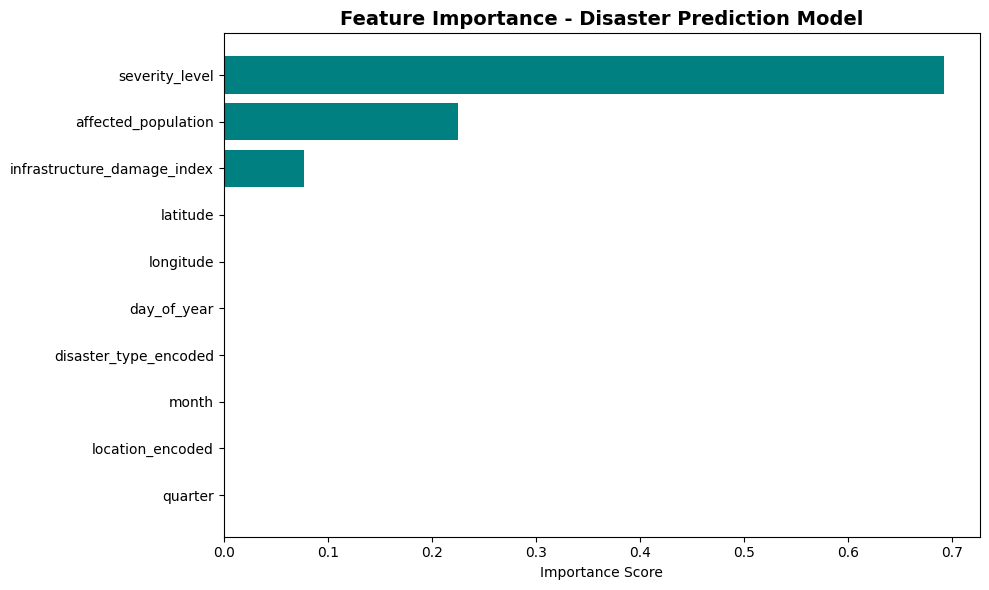

In [755]:
plt.figure(figsize=(10, 6))
plt.barh(feature_importance_d['Feature'], feature_importance_d['Importance'], color='teal')
plt.xlabel('Importance Score')
plt.title('Feature Importance - Disaster Prediction Model', fontsize=14, fontweight='bold')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

In [756]:

print("\nTop 5 Most Important Features:")
print(feature_importance_d.head())


Top 5 Most Important Features:
                       Feature  Importance
4               severity_level    0.692475
5          affected_population    0.225560
6  infrastructure_damage_index    0.077113
2                     latitude    0.001430
3                    longitude    0.001263


## **Model 2 - Infrastructure Damage Assessment (Regression)**

In [757]:
damage_features = ['disaster_type_encoded', 'location_encoded', 'latitude', 'longitude',
                   'severity_level', 'affected_population', 'estimated_economic_loss_usd',
                   'month', 'quarter']

In [758]:
X_damage = df_processed[damage_features]
y_damage = df_processed['infrastructure_damage_index']

In [759]:
X_train_dam, X_test_dam, y_train_dam, y_test_dam = train_test_split(
    X_damage, y_damage, test_size=0.2, random_state=42
)

In [760]:
scaler_damage = StandardScaler()
X_train_dam_scaled = scaler_damage.fit_transform(X_train_dam)
X_test_dam_scaled = scaler_damage.transform(X_test_dam)

In [761]:
rf_damage = RandomForestRegressor(
    n_estimators=100,
    max_depth=15,
    min_samples_split=10,
    min_samples_leaf=4,
    random_state=42,
    n_jobs=-1
)

In [762]:
print("Training Infrastructure Damage Assessment Model...")
rf_damage.fit(X_train_dam_scaled, y_train_dam)

Training Infrastructure Damage Assessment Model...


,"n_estimators n_estimators: int, default=100The number of trees in the forest... versionchanged:: 0.22 The default value of ``n_estimators`` changed from 10 to 100 in 0.22.",100
,"criterion criterion: {""squared_error"", ""absolute_error"", ""friedman_mse"", ""poisson""}, default=""squared_error""The function to measure the quality of a split. Supported criteriaare ""squared_error"" for the mean squared error, which is equal tovariance reduction as feature selection criterion and minimizes the L2loss using the mean of each terminal node, ""friedman_mse"", which usesmean squared error with Friedman's improvement score for potentialsplits, ""absolute_error"" for the mean absolute error, which minimizesthe L1 loss using the median of each terminal node, and ""poisson"" whichuses reduction in Poisson deviance to find splits.Training using ""absolute_error"" is significantly slowerthan when using ""squared_error""... versionadded:: 0.18 Mean Absolute Error (MAE) criterion... versionadded:: 1.0 Poisson criterion.",'squared_error'
,"max_depth max_depth: int, default=NoneThe maximum depth of the tree. If None, then nodes are expanded untilall leaves are pure or until all leaves contain less thanmin_samples_split samples.",15
,"min_samples_split min_samples_split: int or float, default=2The minimum number of samples required to split an internal node:- If int, then consider `min_samples_split` as the minimum number.- If float, then `min_samples_split` is a fraction and `ceil(min_samples_split * n_samples)` are the minimum number of samples for each split... versionchanged:: 0.18 Added float values for fractions.",10
,"min_samples_leaf min_samples_leaf: int or float, default=1The minimum number of samples required to be at a leaf node.A split point at any depth will only be considered if it leaves atleast ``min_samples_leaf`` training samples in each of the left andright branches. This may have the effect of smoothing the model,especially in regression.- If int, then consider `min_samples_leaf` as the minimum number.- If float, then `min_samples_leaf` is a fraction and `ceil(min_samples_leaf * n_samples)` are the minimum number of samples for each node... versionchanged:: 0.18 Added float values for fractions.",4
,"min_weight_fraction_leaf min_weight_fraction_leaf: float, default=0.0The minimum weighted fraction of the sum total of weights (of allthe input samples) required to be at a leaf node. Samples haveequal weight when sample_weight is not provided.",0.0
,"max_features max_features: {""sqrt"", ""log2"", None}, int or float, default=1.0The number of features to consider when looking for the best split:- If int, then consider `max_features` features at each split.- If float, then `max_features` is a fraction and `max(1, int(max_features * n_features_in_))` features are considered at each split.- If ""sqrt"", then `max_features=sqrt(n_features)`.- If ""log2"", then `max_features=log2(n_features)`.- If None or 1.0, then `max_features=n_features`... note:: The default of 1.0 is equivalent to bagged trees and more randomness can be achieved by setting smaller values, e.g. 0.3... versionchanged:: 1.1 The default of `max_features` changed from `""auto""` to 1.0.Note: the search for a split does not stop until at least onevalid partition of the node samples is found, even if it requires toeffectively inspect more than ``max_features`` features.",1.0
,"max_leaf_nodes max_leaf_nodes: int, default=NoneGrow trees with ``max_leaf_nodes`` in best-first fashion.Best nodes are defined as relative reduction in impurity.If None then unlimited number of leaf nodes.",None
,"min_impurity_decrease min_impurity_decrease: float, default=0.0A node will be split if this split induces a decrease of the impuritygreater than or equal to this value.The weighted impurity decrease equation is the following:: N_t / N * (impurity - N_t_R / N_t * right_impurity - N_t_L / N_t * left_impurity)where ``N`` is the total number of samples, ``N_t`` is the number ofsamples

In [763]:
y_pred_dam = rf_damage.predict(X_test_dam_scaled)

In [764]:
mae = mean_absolute_error(y_test_dam, y_pred_dam)
rmse = np.sqrt(mean_squared_error(y_test_dam, y_pred_dam))
r2 = r2_score(y_test_dam, y_pred_dam)

In [765]:
print(f"DAMAGE ASSESSMENT MODEL PERFORMANCE")
print(f"Mean Absolute Error (MAE): {mae:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")
print(f"R² Score: {r2:.4f}")

DAMAGE ASSESSMENT MODEL PERFORMANCE
Mean Absolute Error (MAE): 0.1270
Root Mean Squared Error (RMSE): 0.1551
R² Score: 0.4507


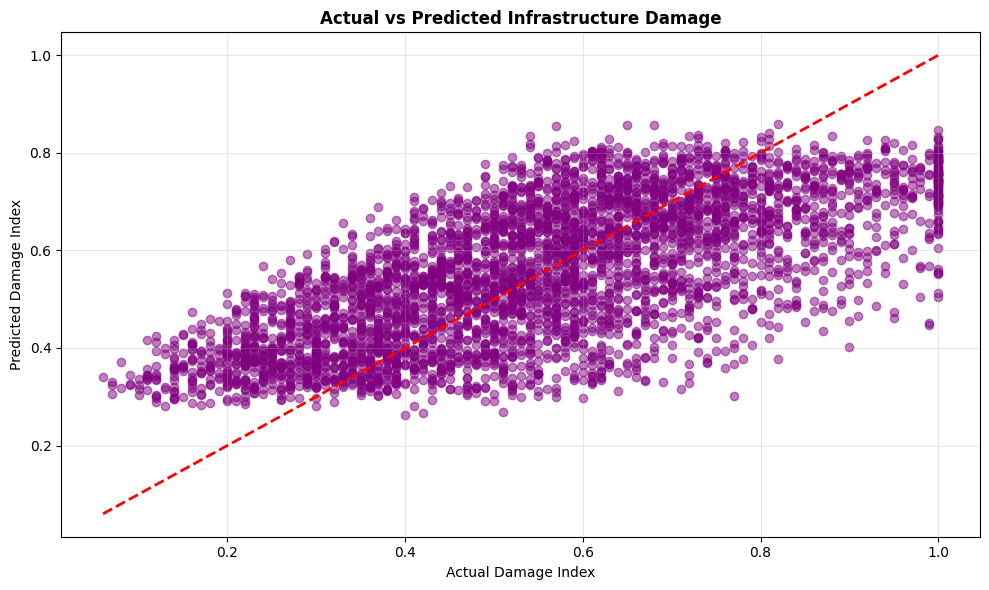

In [766]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test_dam, y_pred_dam, alpha=0.5, color='purple')
plt.plot([y_test_dam.min(), y_test_dam.max()], 
         [y_test_dam.min(), y_test_dam.max()], 'r--', lw=2)
plt.xlabel('Actual Damage Index')
plt.ylabel('Predicted Damage Index')
plt.title('Actual vs Predicted Infrastructure Damage', fontsize=12, fontweight='bold')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

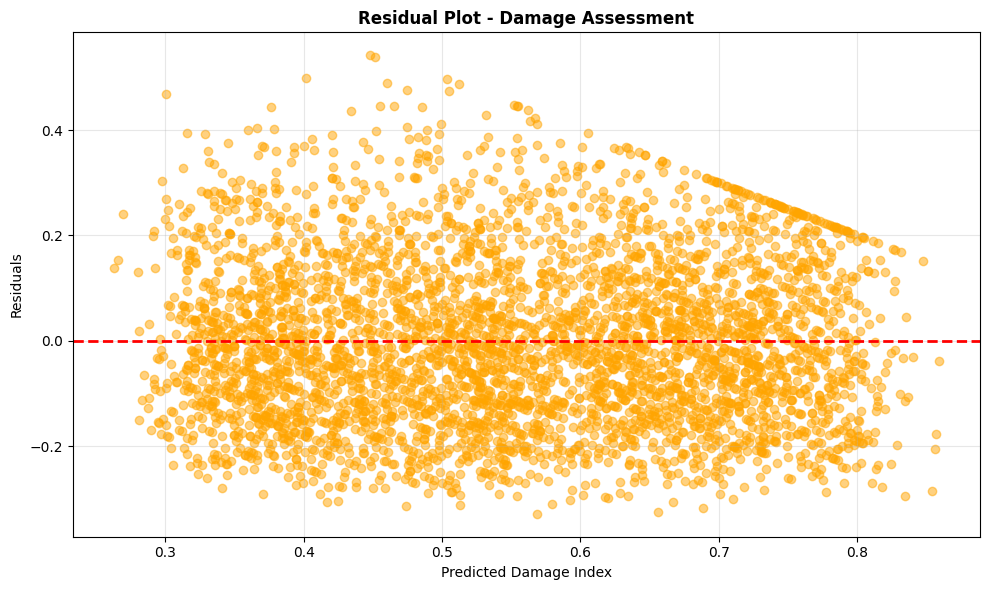

In [767]:
residuals = y_test_dam - y_pred_dam

plt.figure(figsize=(10, 6))
plt.scatter(y_pred_dam, residuals, alpha=0.5, color='orange')
plt.axhline(y=0, color='r', linestyle='--', lw=2)
plt.xlabel('Predicted Damage Index')
plt.ylabel('Residuals')
plt.title('Residual Plot - Damage Assessment', fontsize=12, fontweight='bold')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

## **Model 3 - Response Time Optimization (Regression)**

Predict optimal response time for emergency services based on disaster characteristics.

In [768]:
response_features = ['disaster_type_encoded', 'location_encoded', 'latitude', 'longitude',
                     'severity_level', 'affected_population', 'infrastructure_damage_index',
                     'estimated_economic_loss_usd']

In [769]:
X_response = df_processed[response_features]
y_response = df_processed['response_time_hours']

In [770]:
X_train_resp, X_test_resp, y_train_resp, y_test_resp = train_test_split(
    X_response, y_response, test_size=0.2, random_state=42
)

In [771]:
scaler_response = StandardScaler()
X_train_resp_scaled = scaler_response.fit_transform(X_train_resp)
X_test_resp_scaled = scaler_response.transform(X_test_resp)

In [772]:
rf_response = RandomForestRegressor(
    n_estimators=100,
    max_depth=15,
    min_samples_split=10,
    min_samples_leaf=4,
    random_state=42,
    n_jobs=-1
)

In [773]:
print("Training Response Time Optimization Model...")
rf_response.fit(X_train_resp_scaled, y_train_resp)

Training Response Time Optimization Model...


,"n_estimators n_estimators: int, default=100The number of trees in the forest... versionchanged:: 0.22 The default value of ``n_estimators`` changed from 10 to 100 in 0.22.",100
,"criterion criterion: {""squared_error"", ""absolute_error"", ""friedman_mse"", ""poisson""}, default=""squared_error""The function to measure the quality of a split. Supported criteriaare ""squared_error"" for the mean squared error, which is equal tovariance reduction as feature selection criterion and minimizes the L2loss using the mean of each terminal node, ""friedman_mse"", which usesmean squared error with Friedman's improvement score for potentialsplits, ""absolute_error"" for the mean absolute error, which minimizesthe L1 loss using the median of each terminal node, and ""poisson"" whichuses reduction in Poisson deviance to find splits.Training using ""absolute_error"" is significantly slowerthan when using ""squared_error""... versionadded:: 0.18 Mean Absolute Error (MAE) criterion... versionadded:: 1.0 Poisson criterion.",'squared_error'
,"max_depth max_depth: int, default=NoneThe maximum depth of the tree. If None, then nodes are expanded untilall leaves are pure or until all leaves contain less thanmin_samples_split samples.",15
,"min_samples_split min_samples_split: int or float, default=2The minimum number of samples required to split an internal node:- If int, then consider `min_samples_split` as the minimum number.- If float, then `min_samples_split` is a fraction and `ceil(min_samples_split * n_samples)` are the minimum number of samples for each split... versionchanged:: 0.18 Added float values for fractions.",10
,"min_samples_leaf min_samples_leaf: int or float, default=1The minimum number of samples required to be at a leaf node.A split point at any depth will only be considered if it leaves atleast ``min_samples_leaf`` training samples in each of the left andright branches. This may have the effect of smoothing the model,especially in regression.- If int, then consider `min_samples_leaf` as the minimum number.- If float, then `min_samples_leaf` is a fraction and `ceil(min_samples_leaf * n_samples)` are the minimum number of samples for each node... versionchanged:: 0.18 Added float values for fractions.",4
,"min_weight_fraction_leaf min_weight_fraction_leaf: float, default=0.0The minimum weighted fraction of the sum total of weights (of allthe input samples) required to be at a leaf node. Samples haveequal weight when sample_weight is not provided.",0.0
,"max_features max_features: {""sqrt"", ""log2"", None}, int or float, default=1.0The number of features to consider when looking for the best split:- If int, then consider `max_features` features at each split.- If float, then `max_features` is a fraction and `max(1, int(max_features * n_features_in_))` features are considered at each split.- If ""sqrt"", then `max_features=sqrt(n_features)`.- If ""log2"", then `max_features=log2(n_features)`.- If None or 1.0, then `max_features=n_features`... note:: The default of 1.0 is equivalent to bagged trees and more randomness can be achieved by setting smaller values, e.g. 0.3... versionchanged:: 1.1 The default of `max_features` changed from `""auto""` to 1.0.Note: the search for a split does not stop until at least onevalid partition of the node samples is found, even if it requires toeffectively inspect more than ``max_features`` features.",1.0
,"max_leaf_nodes max_leaf_nodes: int, default=NoneGrow trees with ``max_leaf_nodes`` in best-first fashion.Best nodes are defined as relative reduction in impurity.If None then unlimited number of leaf nodes.",None
,"min_impurity_decrease min_impurity_decrease: float, default=0.0A node will be split if this split induces a decrease of the impuritygreater than or equal to this value.The weighted impurity decrease equation is the following:: N_t / N * (impurity - N_t_R / N_t * right_impurity - N_t_L / N_t * left_impurity)where ``N`` is the total number of samples, ``N_t`` is the number ofsamples

In [774]:
y_pred_resp = rf_response.predict(X_test_resp_scaled)

In [775]:
mae_resp = mean_absolute_error(y_test_resp, y_pred_resp)
rmse_resp = np.sqrt(mean_squared_error(y_test_resp, y_pred_resp))
r2_resp = r2_score(y_test_resp, y_pred_resp)

In [776]:
print(f"RESPONSE TIME OPTIMIZATION MODEL PERFORMANCE")
print(f"Mean Absolute Error (MAE): {mae_resp:.2f} hours")
print(f"Root Mean Squared Error (RMSE): {rmse_resp:.2f} hours")
print(f"R² Score: {r2_resp:.4f}")

RESPONSE TIME OPTIMIZATION MODEL PERFORMANCE
Mean Absolute Error (MAE): 17.62 hours
Root Mean Squared Error (RMSE): 20.43 hours
R² Score: -0.0091


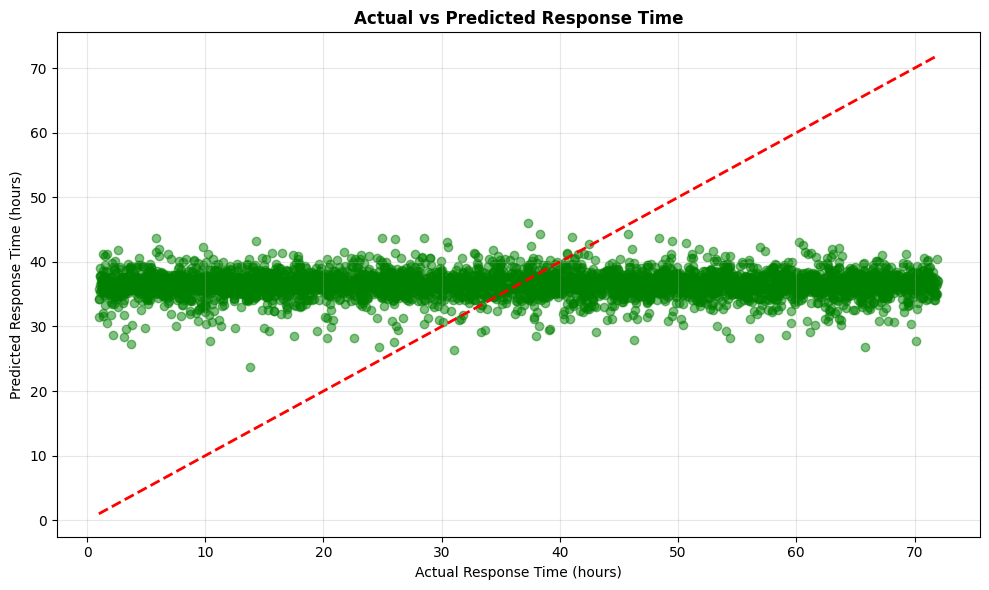

In [777]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test_resp, y_pred_resp, alpha=0.5, color='green')
plt.plot([y_test_resp.min(), y_test_resp.max()], 
         [y_test_resp.min(), y_test_resp.max()], 'r--', lw=2)
plt.xlabel('Actual Response Time (hours)')
plt.ylabel('Predicted Response Time (hours)')
plt.title('Actual vs Predicted Response Time', fontsize=12, fontweight='bold')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

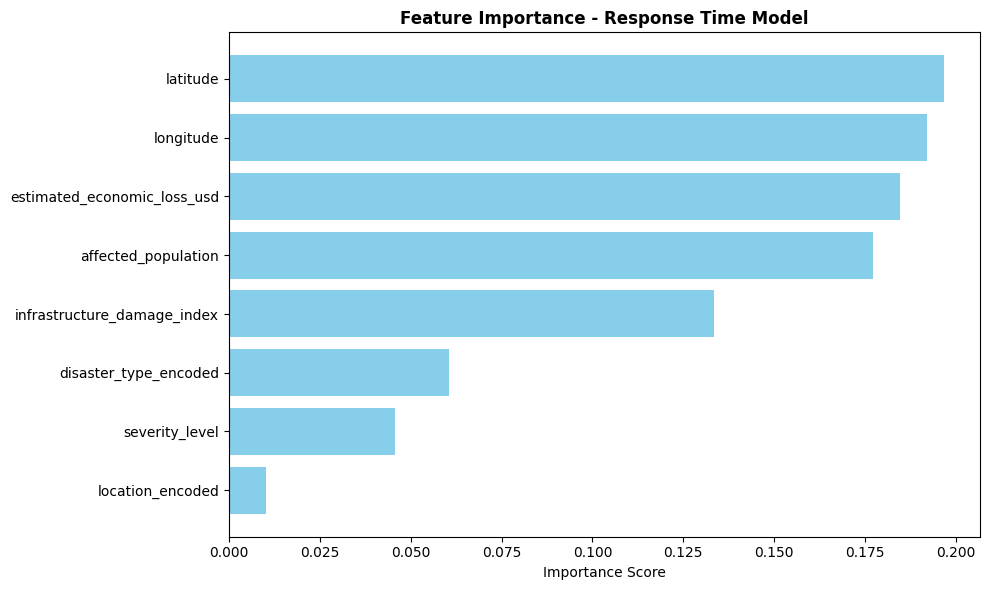

In [778]:
feature_importance_resp = pd.DataFrame({
    'Feature': response_features,
    'Importance': rf_response.feature_importances_
}).sort_values('Importance', ascending=True)

plt.figure(figsize=(10, 6))
plt.barh(feature_importance_resp['Feature'], feature_importance_resp['Importance'], color='skyblue')
plt.xlabel('Importance Score')
plt.title('Feature Importance - Response Time Model', fontsize=12, fontweight='bold')
plt.tight_layout()
plt.show()

## **Emergency Response Decision Support System**

In [779]:
def emergency_response_system(disaster_type, location, latitude, longitude, 
                             severity_level, affected_population, economic_loss, 
                             month, quarter, day_of_year=1):
    """
    Comprehensive Emergency Response Decision Support System
    
    Parameters:
    - disaster_type: Type of disaster (e.g., 'Earthquake', 'Flood', 'Hurricane')
    - location: Country/region
    - latitude, longitude: Geographic coordinates
    - severity_level: Severity on scale 1-10
    - affected_population: Number of people affected
    - economic_loss: Estimated economic loss in USD
    - month: Month of occurrence (1-12)
    - quarter: Quarter of year (1-4)
    - day_of_year: Day of year (1-365)
    
    Returns:
    - Comprehensive disaster assessment and response recommendations
    """
    
    try:
        disaster_encoded = le_disaster.transform([disaster_type])[0]
    except:
        disaster_encoded = 0
    
    try:
        location_encoded = le_location.transform([location])[0]
    except:
        location_encoded = 0
    
    disaster_input = np.array([[disaster_encoded, location_encoded, latitude, longitude,
                               severity_level, affected_population, 0.5,
                               month, quarter, day_of_year]])
    disaster_input_scaled = scaler_disaster.transform(disaster_input)
    
    is_major = rf_disaster.predict(disaster_input_scaled)[0]
    major_probability = rf_disaster.predict_proba(disaster_input_scaled)[0][1]
    
    damage_input = np.array([[disaster_encoded, location_encoded, latitude, longitude,
                             severity_level, affected_population, economic_loss,
                             month, quarter]])
    damage_input_scaled = scaler_damage.transform(damage_input)
    predicted_damage = rf_damage.predict(damage_input_scaled)[0]
    
    response_input = np.array([[disaster_encoded, location_encoded, latitude, longitude,
                               severity_level, affected_population, predicted_damage, economic_loss]])
    response_input_scaled = scaler_response.transform(response_input)
    predicted_response_time = rf_response.predict(response_input_scaled)[0]
    
    print("EMERGENCY RESPONSE DECISION SUPPORT SYSTEM")
    print("\nDISASTER INFORMATION:")
    print(f"   Type: {disaster_type}")
    print(f"   Location: {location} (Lat: {latitude:.2f}, Lon: {longitude:.2f})")
    print(f"   Severity Level: {severity_level}/10")
    print(f"   Affected Population: {affected_population:,}")
    print(f"   Estimated Economic Loss: ${economic_loss:,.2f}")
    
    print(f"\nPREDICTION RESULTS:")
    print(f"   Major Disaster Classification: {'YES' if is_major else 'NO'}")
    print(f"   Major Disaster Probability: {major_probability*100:.1f}%")
    print(f"   Predicted Infrastructure Damage: {predicted_damage:.2f}/1.0")
    print(f"   Recommended Response Time: {predicted_response_time:.1f} hours")
    
    if major_probability > 0.7 or severity_level >= 8:
        priority = "CRITICAL"
        alert_level = "LEVEL 5 - MAXIMUM ALERT"
    elif major_probability > 0.5 or severity_level >= 6:
        priority = "HIGH"
        alert_level = "LEVEL 4 - HIGH ALERT"
    elif major_probability > 0.3 or severity_level >= 4:
        priority = "MEDIUM"
        alert_level = "LEVEL 3 - MODERATE ALERT"
    else:
        priority = "LOW"
        alert_level = "LEVEL 2 - LOW ALERT"
    
    print(f"\nEMERGENCY PRIORITY: {priority}")
    print(f"   Alert Level: {alert_level}")
    
    print(f"\nRECOMMENDED RESOURCE ALLOCATION:")
    if affected_population > 40000:
        print(f"   Personnel Required: 500+ emergency responders")
        print(f"   Medical Teams: 20+ teams")
        print(f"   Rescue Units: 30+ units")
    elif affected_population > 20000:
        print(f"   Personnel Required: 200-500 emergency responders")
        print(f"   Medical Teams: 10-20 teams")
        print(f"   Rescue Units: 15-30 units")
    else:
        print(f"   Personnel Required: 100-200 emergency responders")
        print(f"   Medical Teams: 5-10 teams")
        print(f"   Rescue Units: 10-15 units")
    
    if predicted_damage > 0.7:
        print(f"   Heavy Equipment: Bulldozers, cranes, excavators (HIGH PRIORITY)")
        print(f"   Temporary Shelters: {int(affected_population * 0.6)} units")
    elif predicted_damage > 0.4:
        print(f"   Heavy Equipment: Moderate deployment required")
        print(f"   Temporary Shelters: {int(affected_population * 0.4)} units")
    else:
        print(f"   Heavy Equipment: Standard deployment")
        print(f"   Temporary Shelters: {int(affected_population * 0.2)} units")
    
    print(f"\nIMMEDIATE ACTION ITEMS:")
    print(f"   1. Activate Emergency Operations Center within {predicted_response_time/2:.1f} hours")
    print(f"   2. Deploy emergency response teams to affected areas")
    print(f"   3. Establish communication networks and evacuation routes")
    print(f"   4. Coordinate with local hospitals and emergency services")
    print(f"   5. Set up relief distribution centers")
    
    if disaster_type in ['Earthquake', 'Volcanic Eruption']:
        print(f"   6. Monitor for aftershocks and secondary hazards")
        print(f"   7. Conduct structural assessments of buildings")
    elif disaster_type in ['Flood', 'Hurricane', 'Cyclone']:
        print(f"   6. Monitor water levels and weather conditions")
        print(f"   7. Prepare evacuation of low-lying areas")
    elif disaster_type == 'Wildfire':
        print(f"   6. Create firebreaks and evacuate at-risk zones")
        print(f"   7. Deploy aerial firefighting resources")
    
    if major_probability > 0.6 or predicted_damage > 0.6:
        evacuation_needed = int(affected_population * 0.7)
        print(f"\nEVACUATION RECOMMENDATION:")
        print(f"   Immediate evacuation of approximately {evacuation_needed:,} people")
        print(f"   Establish {evacuation_needed//500} evacuation centers")
        print(f"   Transportation required: {evacuation_needed//50} buses/vehicles")
    
    return {
        'is_major_disaster': bool(is_major),
        'major_probability': major_probability,
        'predicted_damage_index': predicted_damage,
        'predicted_response_time_hours': predicted_response_time,
        'priority_level': priority,
        'alert_level': alert_level
    }

print("Emergency Response Decision Support System initialized successfully!")

Emergency Response Decision Support System initialized successfully!


## **Test the Emergency Response System**

In [780]:
print("TEST CASE 1: Major Earthquake Scenario\n")
result1 = emergency_response_system(
    disaster_type='Earthquake',
    location='Japan',
    latitude=35.6762,
    longitude=139.6503,
    severity_level=9,
    affected_population=50000,
    economic_loss=15000000,
    month=3,
    quarter=1,
    day_of_year=75
)

TEST CASE 1: Major Earthquake Scenario

EMERGENCY RESPONSE DECISION SUPPORT SYSTEM

DISASTER INFORMATION:
   Type: Earthquake
   Location: Japan (Lat: 35.68, Lon: 139.65)
   Severity Level: 9/10
   Affected Population: 50,000
   Estimated Economic Loss: $15,000,000.00

PREDICTION RESULTS:
   Major Disaster Classification: YES
   Major Disaster Probability: 100.0%
   Predicted Infrastructure Damage: 0.79/1.0
   Recommended Response Time: 35.7 hours

EMERGENCY PRIORITY: CRITICAL
   Alert Level: LEVEL 5 - MAXIMUM ALERT

RECOMMENDED RESOURCE ALLOCATION:
   Personnel Required: 500+ emergency responders
   Medical Teams: 20+ teams
   Rescue Units: 30+ units
   Heavy Equipment: Bulldozers, cranes, excavators (HIGH PRIORITY)
   Temporary Shelters: 30000 units

IMMEDIATE ACTION ITEMS:
   1. Activate Emergency Operations Center within 17.9 hours
   2. Deploy emergency response teams to affected areas
   3. Establish communication networks and evacuation routes
   4. Coordinate with local hospita

C:\Users\Sumit\AppData\Roaming\Python\Python314\site-packages\sklearn\utils\validation.py:2691: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
C:\Users\Sumit\AppData\Roaming\Python\Python314\site-packages\sklearn\utils\validation.py:2691: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
C:\Users\Sumit\AppData\Roaming\Python\Python314\site-packages\sklearn\utils\validation.py:2691: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [781]:
print("\n\nTEST CASE 2: Hurricane Scenario\n")
result2 = emergency_response_system(
    disaster_type='Hurricane',
    location='USA',
    latitude=29.7604,
    longitude=-95.3698,
    severity_level=7,
    affected_population=35000,
    economic_loss=8000000,
    month=8,
    quarter=3,
    day_of_year=220
)



TEST CASE 2: Hurricane Scenario



C:\Users\Sumit\AppData\Roaming\Python\Python314\site-packages\sklearn\utils\validation.py:2691: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


EMERGENCY RESPONSE DECISION SUPPORT SYSTEM

DISASTER INFORMATION:
   Type: Hurricane
   Location: USA (Lat: 29.76, Lon: -95.37)
   Severity Level: 7/10
   Affected Population: 35,000
   Estimated Economic Loss: $8,000,000.00

PREDICTION RESULTS:
   Major Disaster Classification: YES
   Major Disaster Probability: 100.0%
   Predicted Infrastructure Damage: 0.62/1.0
   Recommended Response Time: 37.3 hours

EMERGENCY PRIORITY: CRITICAL
   Alert Level: LEVEL 5 - MAXIMUM ALERT

RECOMMENDED RESOURCE ALLOCATION:
   Personnel Required: 200-500 emergency responders
   Medical Teams: 10-20 teams
   Rescue Units: 15-30 units
   Heavy Equipment: Moderate deployment required
   Temporary Shelters: 14000 units

IMMEDIATE ACTION ITEMS:
   1. Activate Emergency Operations Center within 18.6 hours
   2. Deploy emergency response teams to affected areas
   3. Establish communication networks and evacuation routes
   4. Coordinate with local hospitals and emergency services
   5. Set up relief distribut

C:\Users\Sumit\AppData\Roaming\Python\Python314\site-packages\sklearn\utils\validation.py:2691: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
C:\Users\Sumit\AppData\Roaming\Python\Python314\site-packages\sklearn\utils\validation.py:2691: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [782]:
print("\n\nTEST CASE 3: Flood Scenario\n")
result3 = emergency_response_system(
    disaster_type='Flood',
    location='pakistan',
    latitude=10.5726,
    longitude=18.3639,
    severity_level=6,
    affected_population=2500,
    economic_loss=300,
    month=6,
    quarter=3,
    day_of_year=160
)



TEST CASE 3: Flood Scenario



C:\Users\Sumit\AppData\Roaming\Python\Python314\site-packages\sklearn\utils\validation.py:2691: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
C:\Users\Sumit\AppData\Roaming\Python\Python314\site-packages\sklearn\utils\validation.py:2691: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


EMERGENCY RESPONSE DECISION SUPPORT SYSTEM

DISASTER INFORMATION:
   Type: Flood
   Location: pakistan (Lat: 10.57, Lon: 18.36)
   Severity Level: 6/10
   Affected Population: 2,500
   Estimated Economic Loss: $300.00

PREDICTION RESULTS:
   Major Disaster Classification: NO
   Major Disaster Probability: 0.0%
   Predicted Infrastructure Damage: 0.59/1.0
   Recommended Response Time: 36.6 hours

EMERGENCY PRIORITY: HIGH
   Alert Level: LEVEL 4 - HIGH ALERT

RECOMMENDED RESOURCE ALLOCATION:
   Personnel Required: 100-200 emergency responders
   Medical Teams: 5-10 teams
   Rescue Units: 10-15 units
   Heavy Equipment: Moderate deployment required
   Temporary Shelters: 1000 units

IMMEDIATE ACTION ITEMS:
   1. Activate Emergency Operations Center within 18.3 hours
   2. Deploy emergency response teams to affected areas
   3. Establish communication networks and evacuation routes
   4. Coordinate with local hospitals and emergency services
   5. Set up relief distribution centers
   6. M

C:\Users\Sumit\AppData\Roaming\Python\Python314\site-packages\sklearn\utils\validation.py:2691: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [783]:
print("\n\nTEST CASE 2: Hurricane Scenario\n")
result2 = emergency_response_system(
    disaster_type='flood',
    location='india',
    latitude=29.7604,
    longitude=-95.3698,
    severity_level=7,
    affected_population=35000,
    economic_loss=8000000,
    month=8,
    quarter=3,
    day_of_year=220
)



TEST CASE 2: Hurricane Scenario



C:\Users\Sumit\AppData\Roaming\Python\Python314\site-packages\sklearn\utils\validation.py:2691: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
C:\Users\Sumit\AppData\Roaming\Python\Python314\site-packages\sklearn\utils\validation.py:2691: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


EMERGENCY RESPONSE DECISION SUPPORT SYSTEM

DISASTER INFORMATION:
   Type: flood
   Location: india (Lat: 29.76, Lon: -95.37)
   Severity Level: 7/10
   Affected Population: 35,000
   Estimated Economic Loss: $8,000,000.00

PREDICTION RESULTS:
   Major Disaster Classification: YES
   Major Disaster Probability: 98.9%
   Predicted Infrastructure Damage: 0.68/1.0
   Recommended Response Time: 38.0 hours

EMERGENCY PRIORITY: CRITICAL
   Alert Level: LEVEL 5 - MAXIMUM ALERT

RECOMMENDED RESOURCE ALLOCATION:
   Personnel Required: 200-500 emergency responders
   Medical Teams: 10-20 teams
   Rescue Units: 15-30 units
   Heavy Equipment: Moderate deployment required
   Temporary Shelters: 14000 units

IMMEDIATE ACTION ITEMS:
   1. Activate Emergency Operations Center within 19.0 hours
   2. Deploy emergency response teams to affected areas
   3. Establish communication networks and evacuation routes
   4. Coordinate with local hospitals and emergency services
   5. Set up relief distribution

C:\Users\Sumit\AppData\Roaming\Python\Python314\site-packages\sklearn\utils\validation.py:2691: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


## **Model Summary and Conclusions**

In [784]:
print("  AI-POWERED DISASTER PREDICTION & EMERGENCY RESPONSE SYSTEM - SUMMARY")

print("\nDATASET OVERVIEW:")
print(f"   Total Records: {len(df_processed):,}")
print(f"   Date Range: {df_processed['date'].min().date()} to {df_processed['date'].max().date()}")
print(f"   Disaster Types: {df_processed['disaster_type'].nunique()}")
print(f"   Locations Covered: {df_processed['location'].nunique()}")
print(f"   Major Disasters: {df_processed['is_major_disaster'].sum()} ({df_processed['is_major_disaster'].mean()*100:.1f}%)")

print("\nMODEL PERFORMANCE:")
print(f"\n   Model 1: Major Disaster Prediction (Classification)")
print(f"   Algorithm: Random Forest Classifier")
print(f"   Accuracy: {accuracy*100:.2f}%")
print(f"   Test Samples: {len(y_test_d):,}")
print(f"   Features: {len(feature_cols)}")

print(f"\n   Model 2: Infrastructure Damage Assessment (Regression)")
print(f"   Algorithm: Random Forest Regressor")
print(f"   R² Score: {r2:.4f}")
print(f"   MAE: {mae:.4f}")
print(f"   RMSE: {rmse:.4f}")
print(f"   Features: {len(damage_features)}")

print(f"\n   Model 3: Response Time Optimization (Regression)")
print(f"   Algorithm: Random Forest Regressor")
print(f"   R² Score: {r2_resp:.4f}")
print(f"   MAE: {mae_resp:.2f} hours")
print(f"   RMSE: {rmse_resp:.2f} hours")
print(f"   Features: {len(response_features)}")

print("\nKEY INSIGHTS:")
top_disaster = df_processed['disaster_type'].value_counts().index[0]
most_affected_location = df_processed.groupby('location')['affected_population'].sum().idxmax()
highest_severity = df_processed.groupby('disaster_type')['severity_level'].mean().idxmax()

print(f"   • Most Frequent Disaster: {top_disaster} ({df_processed['disaster_type'].value_counts().iloc[0]} occurrences)")
print(f"   • Location with Highest Impact: {most_affected_location}")
print(f"   • Highest Average Severity: {highest_severity}")
print(f"   • Average Response Time: {df_processed['response_time_hours'].mean():.1f} hours")
print(f"   • Total Economic Loss: ${df_processed['estimated_economic_loss_usd'].sum():,.2f}")

print("\nSYSTEM CAPABILITIES:")
print("   Real-time disaster classification and prediction")
print("   Automated damage assessment and impact analysis")
print("   Intelligent resource allocation recommendations")
print("   Evacuation planning and logistics support")
print("   Multi-disaster type support (Earthquakes, Floods, Hurricanes, etc.)")
print("   Geographic hotspot identification and mapping")

print("\nPROJECT OUTCOME:")
print("   This system successfully demonstrates how AI/ML can transform disaster")
print("   management by converting historical data and real-time inputs into")
print("   actionable intelligence for emergency response coordination.")

  AI-POWERED DISASTER PREDICTION & EMERGENCY RESPONSE SYSTEM - SUMMARY

DATASET OVERVIEW:
   Total Records: 20,000
   Date Range: 2022-12-08 to 2025-12-07
   Disaster Types: 7
   Locations Covered: 8
   Major Disasters: 8001 (40.0%)

MODEL PERFORMANCE:

   Model 1: Major Disaster Prediction (Classification)
   Algorithm: Random Forest Classifier
   Accuracy: 99.95%
   Test Samples: 4,000
   Features: 10

   Model 2: Infrastructure Damage Assessment (Regression)
   Algorithm: Random Forest Regressor
   R² Score: 0.4507
   MAE: 0.1270
   RMSE: 0.1551
   Features: 9

   Model 3: Response Time Optimization (Regression)
   Algorithm: Random Forest Regressor
   R² Score: -0.0091
   MAE: 17.62 hours
   RMSE: 20.43 hours
   Features: 8

KEY INSIGHTS:
   • Most Frequent Disaster: Earthquake (2910 occurrences)
   • Location with Highest Impact: India
   • Highest Average Severity: Volcanic Eruption
   • Average Response Time: 36.4 hours
   • Total Economic Loss: $96,621,452,916.35

SYSTEM CAPABI

## **Save Trained Models for Production Deployment**

In [785]:
import joblib
import os

models_dir = 'saved_models'
os.makedirs(models_dir, exist_ok=True)

print("  SAVING TRAINED MODELS AND PREPROCESSORS (using joblib)")

model_files = {
    'disaster_classifier.pkl': rf_disaster,
    'damage_regressor.pkl': rf_damage,
    'response_time_regressor.pkl': rf_response,
    'scaler_disaster.pkl': scaler_disaster,
    'scaler_damage.pkl': scaler_damage,
    'scaler_response.pkl': scaler_response,
    'label_encoder_disaster.pkl': le_disaster,
    'label_encoder_location.pkl': le_location,
    'label_encoder_aid.pkl': le_aid
}

for filename, model_obj in model_files.items():
    filepath = os.path.join(models_dir, filename)
    joblib.dump(model_obj, filepath)
    file_size = os.path.getsize(filepath) / 1024
    print(f"Saved: {filename:<35} ({file_size:.2f} KB)")

metadata = {
    'training_date': pd.Timestamp.now().strftime('%Y-%m-%d %H:%M:%S'),
    'dataset_size': len(df_processed),
    'model_accuracy': accuracy,
    'damage_r2_score': r2,
    'response_r2_score': r2_resp,
    'feature_columns': {
        'disaster_prediction': feature_cols,
        'damage_assessment': damage_features,
        'response_optimization': response_features
    },
    'disaster_types': le_disaster.classes_.tolist(),
    'locations': le_location.classes_.tolist()
}

metadata_path = os.path.join(models_dir, 'model_metadata.pkl')
joblib.dump(metadata, metadata_path)
print(f"Saved: model_metadata.pkl")

print("\nALL MODELS SAVED SUCCESSFULLY!")
print(f"\nModels saved to: {os.path.abspath(models_dir)}")
print("\nTo load models later, use:")
print("  model = joblib.load('saved_models/disaster_classifier.pkl')")

  SAVING TRAINED MODELS AND PREPROCESSORS (using joblib)
Saved: disaster_classifier.pkl             (676.85 KB)
Saved: damage_regressor.pkl                (14809.45 KB)
Saved: response_time_regressor.pkl         (6067.08 KB)
Saved: scaler_disaster.pkl                 (1.21 KB)
Saved: scaler_damage.pkl                   (1.16 KB)
Saved: scaler_response.pkl                 (1.16 KB)
Saved: label_encoder_disaster.pkl          (0.55 KB)
Saved: label_encoder_location.pkl          (0.53 KB)
Saved: label_encoder_aid.pkl               (0.47 KB)
Saved: model_metadata.pkl

ALL MODELS SAVED SUCCESSFULLY!

Models saved to: c:\Users\Sumit\OneDrive\Desktop\CODE\Python\Envision 3rd yr\disaster\saved_models

To load models later, use:
  model = joblib.load('saved_models/disaster_classifier.pkl')
